In [ ]:
import os
import sys
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pandas import set_option
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import seaborn as sns
%matplotlib inline

# from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# import performance metrics/measures
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# from imblearn.under_sampling import KMeansSMOTE
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline

In [ ]:
df = pd.read_csv("/content/sensor_dataset.csv")

In [ ]:
if 'Unnamed: 10' in df.columns:
    df = df.drop('Unnamed: 10', axis=1)
print(df.columns)





Index(['Axial RMS Acceleration(m/sec2)', 'Axial RMS Velocity(mm/sec)',
       'Horizontal RMS Acceleration(m/sec2)',
       'Horizontal RMS Velocity(mm/sec)', 'Vertical RMS Acceleration(m/sec2)',
       'Vertical RMS Velocity(mm/sec)', 'Noise (db)', 'Temperature (degC)',
       'Current(A)'],
      dtype='object')


In [ ]:
null_values = df.isnull().sum()
print(null_values)

Axial RMS Acceleration(m/sec2)         0
Axial RMS Velocity(mm/sec)             0
Horizontal RMS Acceleration(m/sec2)    0
Horizontal RMS Velocity(mm/sec)        0
Vertical RMS Acceleration(m/sec2)      0
Vertical RMS Velocity(mm/sec)          0
Noise (db)                             0
Temperature (degC)                     0
Current(A)                             0
dtype: int64


In [ ]:
df.describe()

,Axial RMS Acceleration(m/sec2),Axial RMS Velocity(mm/sec),Horizontal RMS Acceleration(m/sec2),Horizontal RMS Velocity(mm/sec),Vertical RMS Acceleration(m/sec2),Vertical RMS Velocity(mm/sec),Noise (db),Temperature (degC),Current(A)
count,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000
mean,18.634147,7.698832,10.330526,5.677368,10.619693,11.820836,101.436277,54.626105,7.981337
std,1.065352,0.806891,0.607223,0.530366,0.563081,1.117559,2.627295,2.595306,0.740218
min,15.819000,5.849000,8.674000,4.285000,9.044000,9.312000,90.012000,52.473000,7.020000
25%,17.951875,7.195000,9.942500,5.314625,10.242250,11.017000,99.651000,53.145000,7.520000
50%,18.582250,7.651250,10.325500,5.670750,10.594000,11.750500,101.383500,53.200000,7.660000
75%,19.309875,8.107000,10.708875,5.972000,10.979625,12.407000,103.256000,55.600000,8.280000
max,22.642000,12.326000,12.082000,7.849000,12.390000,16.913000,107.600000,65.100000,10.160000


In [ ]:
mean_values = df.mean()
median_values = df.median()
mode_values = df.mode().iloc[0]  # Mode can have multiple values, so taking the first one
std_dev_values = df.std()

# Display the results
print("Mean:\n", mean_values)
print("\nMedian:\n", median_values)
print("\nMode:\n", mode_values)
print("\nStandard Deviation:\n", std_dev_values)

Mean:
 Axial RMS Acceleration(m/sec2)          18.634147
Axial RMS Velocity(mm/sec)               7.698832
Horizontal RMS Acceleration(m/sec2)     10.330526
Horizontal RMS Velocity(mm/sec)          5.677368
Vertical RMS Acceleration(m/sec2)       10.619693
Vertical RMS Velocity(mm/sec)           11.820836
Noise (db)                             101.436277
Temperature (degC)                      54.626105
Current(A)                               7.981337
dtype: float64

Median:
 Axial RMS Acceleration(m/sec2)          18.58225
Axial RMS Velocity(mm/sec)               7.65125
Horizontal RMS Acceleration(m/sec2)     10.32550
Horizontal RMS Velocity(mm/sec)          5.67075
Vertical RMS Acceleration(m/sec2)       10.59400
Vertical RMS Velocity(mm/sec)           11.75050
Noise (db)                             101.38350
Temperature (degC)                      53.20000
Current(A)                               7.66000
dtype: float64

Mode:
 Axial RMS Acceleration(m/sec2)          20.026
Axial R

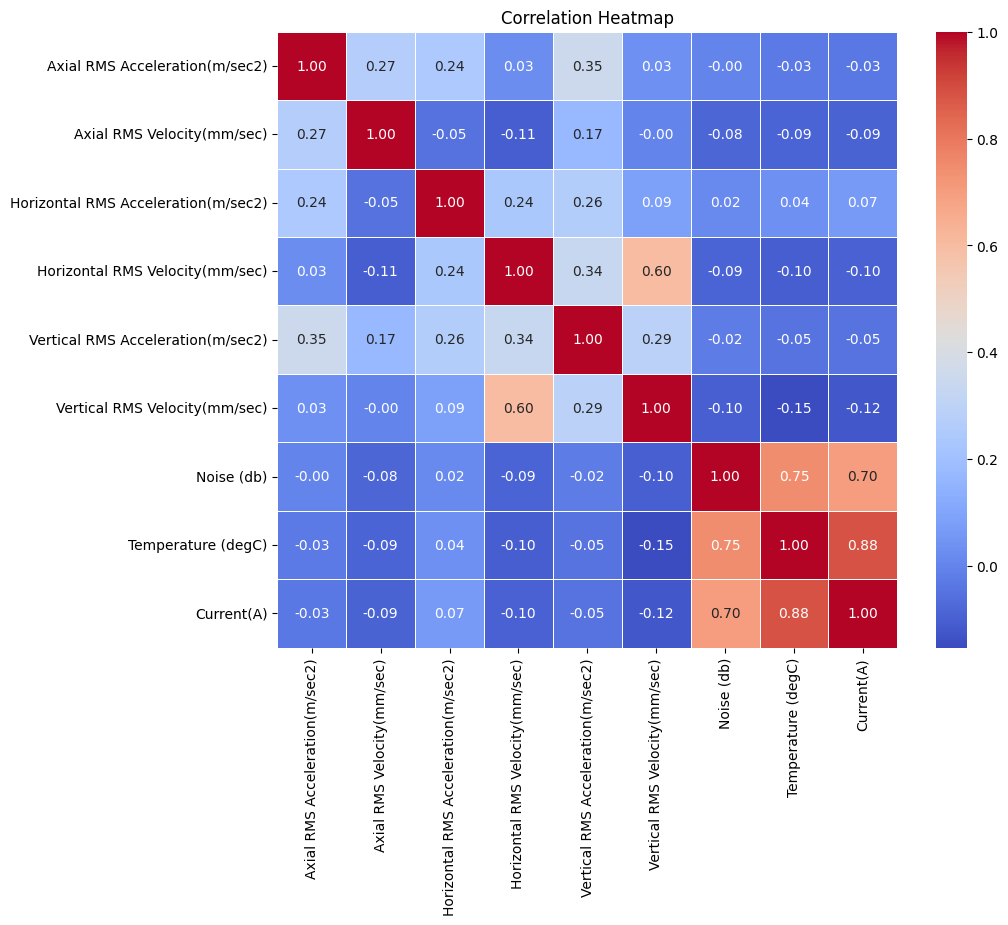

In [ ]:

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


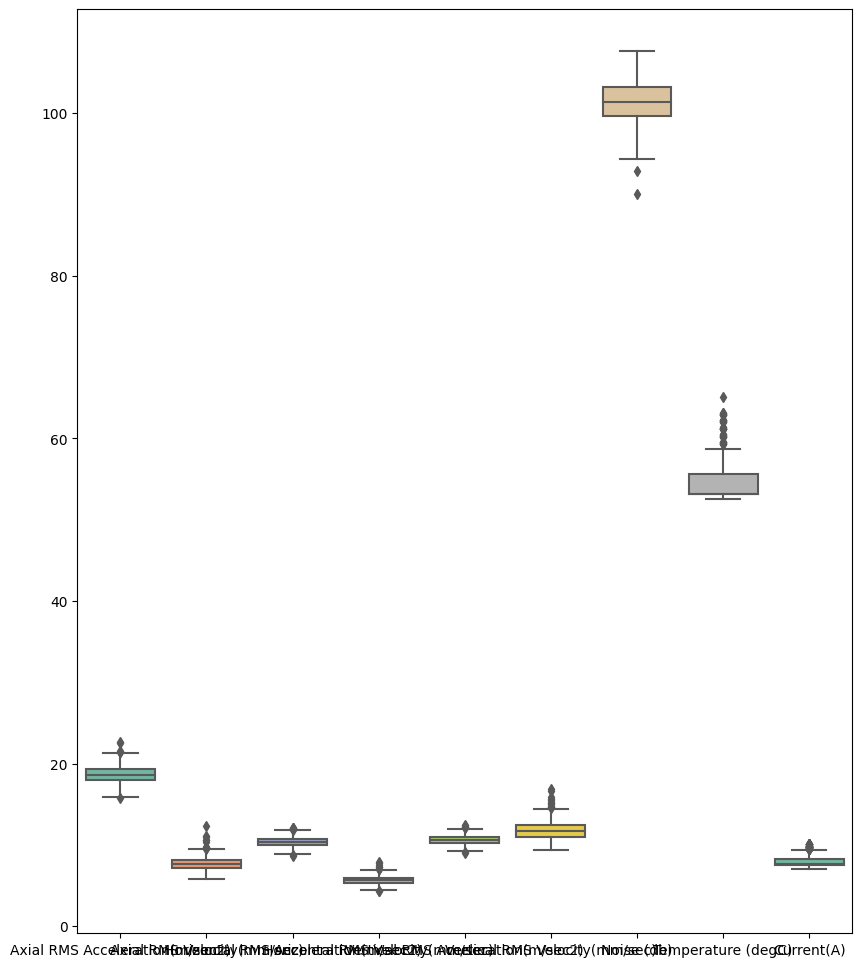

In [ ]:
#create a box plot
plt.figure(figsize=(10, 12))
sns.boxplot(data=df, palette='Set2')
plt.show()

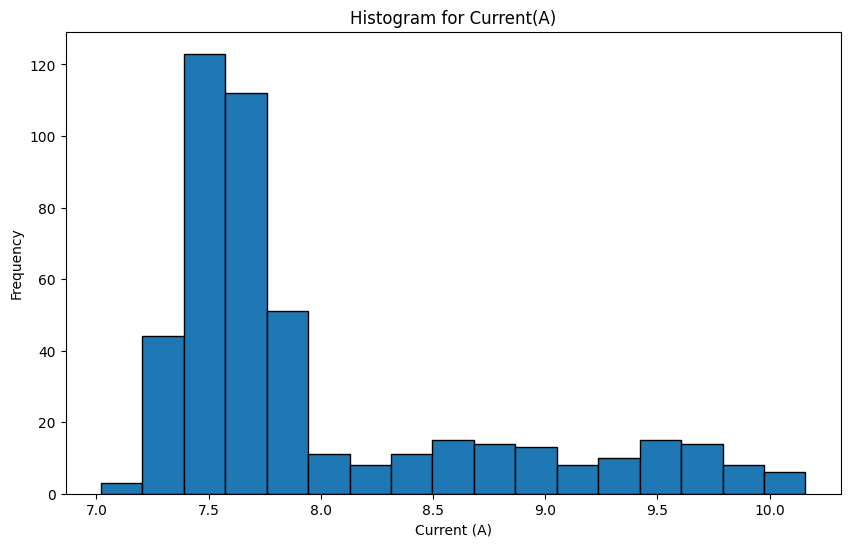

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['Current(A)'], bins='auto', edgecolor='black')
plt.title('Histogram for Current(A)')
plt.xlabel('Current (A)')
plt.ylabel('Frequency')
plt.show()

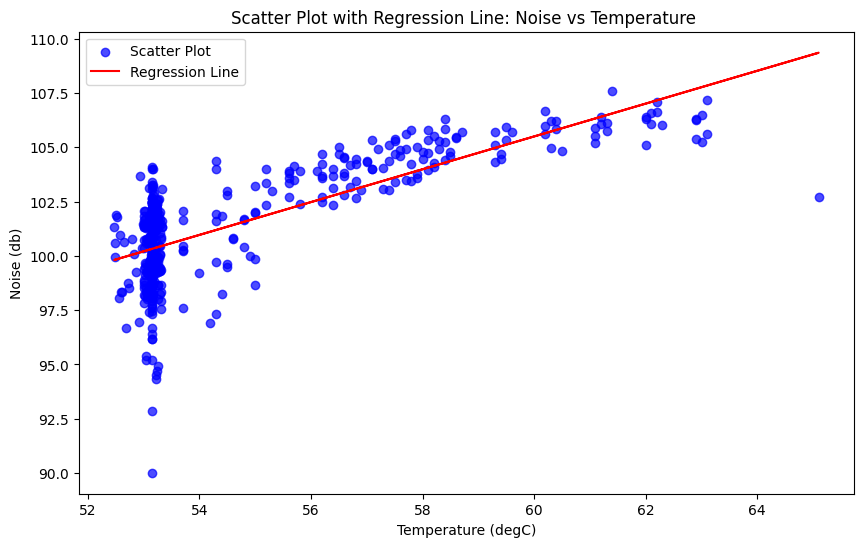

In [ ]:
x = df['Temperature (degC)']
y = df['Noise (db)']

# Fit a simple linear regression model using numpy.polyfit
slope, intercept = np.polyfit(x, y, 1)

# Create the regression line
regression_line = slope * x + intercept

# Plot the scatter plot and regression line
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', alpha=0.7, label='Scatter Plot')
plt.plot(x, regression_line, color='red', label='Regression Line')
plt.title('Scatter Plot with Regression Line: Noise vs Temperature ')
plt.xlabel('Temperature (degC)')
plt.ylabel('Noise (db)')
plt.legend()
plt.show()



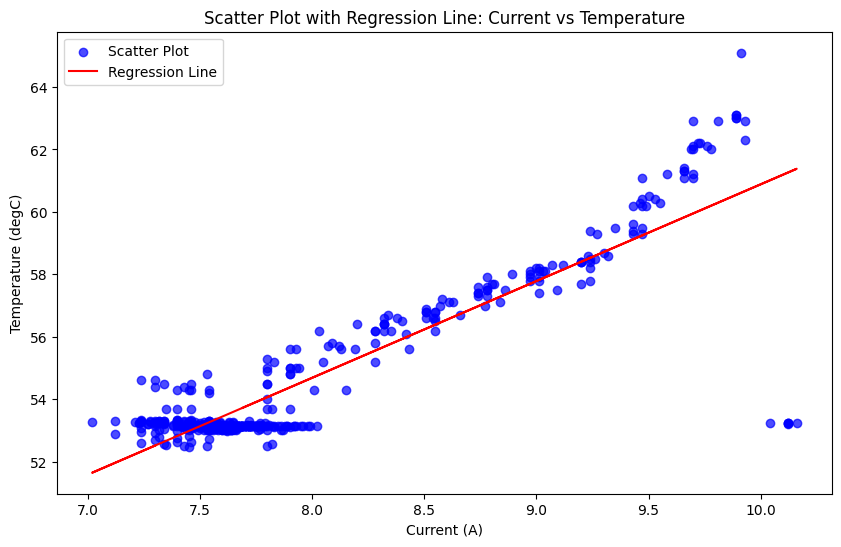

In [ ]:

x = df['Current(A)']
y = df['Temperature (degC)']

# Fit a simple linear regression model using numpy.polyfit
slope, intercept = np.polyfit(x, y, 1)

# Create the regression line
regression_line = slope * x + intercept

# Plot the scatter plot and regression line
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', alpha=0.7, label='Scatter Plot')
plt.plot(x, regression_line, color='red', label='Regression Line')
plt.title('Scatter Plot with Regression Line: Current vs Temperature')
plt.xlabel('Current (A)')
plt.ylabel('Temperature (degC)')
plt.legend()
plt.show()


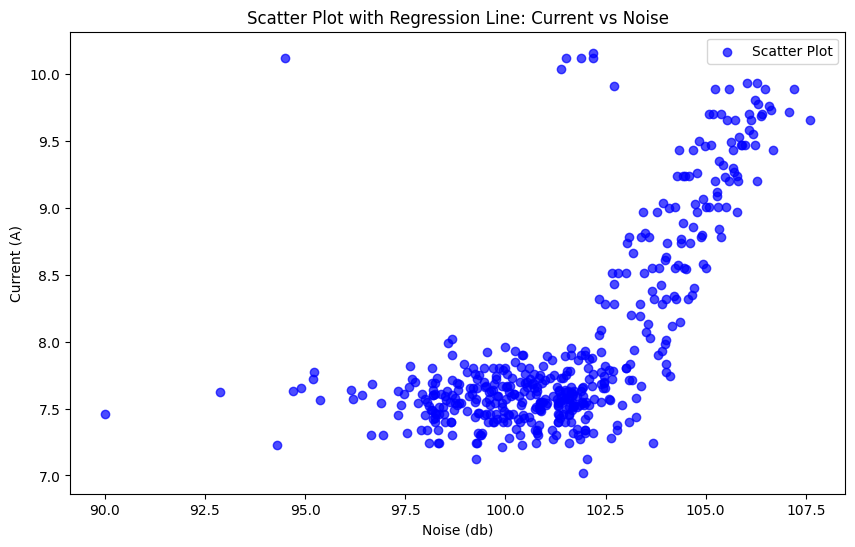

In [ ]:
x = df['Noise (db)']
y = df['Current(A)']

# Fit a simple linear regression model using numpy.polyfit
slope, intercept = np.polyfit(x, y, 1)

# Create the regression line
regression_line = slope * x + intercept

# Plot the scatter plot and regression line
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', alpha=0.7, label='Scatter Plot')
plt.title('Scatter Plot with Regression Line: Current vs Noise')
plt.xlabel('Noise (db)')
plt.ylabel('Current (A)')
plt.legend()
plt.show()



In [ ]:

column_of_interest = df['Temperature (degC)']

start_index = 0
end_index = 111

# Create a sample based on the specified range
sample = column_of_interest[start_index:end_index]

# Calculate mean and standard deviation for the sample
mean_sample1 = sample.mean()
std_dev_sample1 = sample.std(ddof=1)  # ddof=1 for sample standard deviation

# Display the results
print("Sample Mean1:", mean_sample1)
print("Sample Standard Deviation1:", std_dev_sample1)

start=112
end=223
# Create a sample based on the specified range
sample = column_of_interest[start:end]

# Calculate mean and standard deviation for the sample
mean_sample2 = sample.mean()
std_dev_sample2 = sample.std(ddof=1)  # ddof=1 for sample standard deviation

# Display the results
print("Sample Mean2:", mean_sample2)
print("Sample Standard Deviation2:", std_dev_sample2)

# Calculate the Z-statistic
z_stat = abs(mean_sample1 - mean_sample2) / np.sqrt((std_dev_sample1**2 + std_dev_sample2**2) / 112)

# Display the results
print("Z-statistic:", z_stat)



Sample Mean1: 53.71299099099099
Sample Standard Deviation1: 0.9218757310800972
Sample Mean2: 58.67297297297297
Sample Standard Deviation2: 2.0937111872525627
Z-statistic: 22.94530144890535


In [ ]:
import scipy.stats as stats

noise_data = df['Noise (db)']

temperature_data = df['Temperature (degC)']

current_data = df['Current(A)']


# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(noise_data, temperature_data, current_data)

# Print
print("F-Statistic:", f_statistic)
print("P-Value:", p_value)

# Interpret
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in means.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in means.")


F-Statistic: 215171.9179728366
P-Value: 0.0
Reject the null hypothesis. There is a significant difference in means.


In [ ]:

sample_data =[]
for i in range(2,467):
  if i%50==0:
    sample_data.append(df['Noise (db)'][i])
# Specify the hypothesized population mean
population_mean = 101.436277

# Perform one-sample t-test
t_statistic, p_value = stats.ttest_1samp(sample_data, population_mean)

# Print the results
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

# Interpret the results
alpha = 0.05  # Set your significance level
if p_value < alpha:
    print("Reject the null hypothesis. The sample mean is significantly different from the population mean.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in means.")


T-Statistic: -0.24086570088815268
P-Value: 0.8157173789008244
Fail to reject the null hypothesis. There is no significant difference in means.
